In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Reading the scores

In [1]:
df = pd.read_csv("BRCA_data_20210611.csv")#, header=[0])

df

,log_Mutation_rate,SBS2,SBS5,SBS8,SBS13,SBS39,TP53_SNV,SPEN_CNV.Deletion,SDHB_CNV.Deletion,ARHGEF10L_CNV.Deletion,...,CHEK2_CNV.Amplification,EWSR1_CNV.Amplification,NF2_CNV.Amplification,PATZ1_CNV.Amplification,PHF6_CNV.Amplification,ploidy,Genome.doublings,Aneuploidy_score,quiescence_score,SampleID
0,3.055738,0.332830,0.000000e+00,0.0,0.461651,0.011415,1,0,0,0,...,1,1,1,1,0,3.05,1,22,-5.273611,TCGA-3C-AALI-01
1,0.596520,0.000000,3.513145e-08,0.0,0.000000,0.090518,0,0,0,0,...,0,0,0,0,0,3.90,1,13,-4.529468,TCGA-3C-AALJ-01
2,0.625094,0.100502,8.167372e-03,0.0,0.000000,0.112661,0,0,0,0,...,0,0,0,0,0,2.05,0,4,-2.040742,TCGA-3C-AALK-01
3,1.930758,0.333795,0.000000e+00,0.0,0.292365,0.007665,0,0,0,0,...,0,0,0,0,0,2.00,0,3,-0.024824,TCGA-5L-AAT0-01
4,0.610909,0.000000,0.000000e+00,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,3.12,1,14,-6.754528,TCGA-5T-A9QA-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.505549,0.348062,2.530858e-08,0.0,0.000000,0.075875,0,0,0,0,...,0,0,0,0,0,1.93,0,8,2.635723,TCGA-WT-AB41-01
498,0.505549,0.000000,3.109403e-01,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,3.90,1,18,7.065860,TCGA-WT-AB44-01
499,0.351398,0.179598,4.285414e-02,0.0,0.199417,0.000000,0,0,0,0,...,0,0,0,0,0,2.02,0,4,-0.047923,TCGA-XX-A899-01
500,1.899748,0.212199,0.000000e+00,0.0,0.472451,0.030130,0,1,1,1,...,0,0,0,0,0,3.46,1,32,2.096436,TCGA-XX-A89A-01


# Assigning binary labels to the quiescence score

In [2]:
label=df['quiescence_score']
df['label_binary']=np.where(df['quiescence_score']>df['quiescence_score'].mean(),1,0)
label_binary=df['label_binary']
print('zeros: '+str(df[df['label_binary']==0].shape[0]))
print('ones: '+str(df[df['label_binary']==1].shape[0]))

zeros: 241
ones: 261


# Don't consider Aneuploidy_score

In [3]:
df=df.drop(['Aneuploidy_score','quiescence_score','SampleID','label_binary'], axis=1)

df

,log_Mutation_rate,SBS2,SBS5,SBS8,SBS13,SBS39,TP53_SNV,SPEN_CNV.Deletion,SDHB_CNV.Deletion,ARHGEF10L_CNV.Deletion,...,DGCR8_CNV.Amplification,MAPK1_CNV.Amplification,MN1_CNV.Amplification,CHEK2_CNV.Amplification,EWSR1_CNV.Amplification,NF2_CNV.Amplification,PATZ1_CNV.Amplification,PHF6_CNV.Amplification,ploidy,Genome.doublings
0,3.055738,0.332830,0.000000e+00,0.0,0.461651,0.011415,1,0,0,0,...,1,1,1,1,1,1,1,0,3.05,1
1,0.596520,0.000000,3.513145e-08,0.0,0.000000,0.090518,0,0,0,0,...,0,0,0,0,0,0,0,0,3.90,1
2,0.625094,0.100502,8.167372e-03,0.0,0.000000,0.112661,0,0,0,0,...,0,0,0,0,0,0,0,0,2.05,0
3,1.930758,0.333795,0.000000e+00,0.0,0.292365,0.007665,0,0,0,0,...,0,0,0,0,0,0,0,0,2.00,0
4,0.610909,0.000000,0.000000e+00,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,3.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0.505549,0.348062,2.530858e-08,0.0,0.000000,0.075875,0,0,0,0,...,0,0,0,0,0,0,0,0,1.93,0
498,0.505549,0.000000,3.109403e-01,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,3.90,1
499,0.351398,0.179598,4.285414e-02,0.0,0.199417,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,2.02,0
500,1.899748,0.212199,0.000000e+00,0.0,0.472451,0.030130,0,1,1,1,...,0,0,0,0,0,0,0,0,3.46,1


# RF prediction considering the most important features according to Anova selection

Taking into accout 30 features
['TP53_SNV' 'MYC_CNV.Amplification' 'CCND2_CNV.Amplification'
 'ERC1_CNV.Amplification' 'PTPN6_CNV.Amplification'
 'COX6C_CNV.Amplification' 'CHD4_CNV.Amplification'
 'ZNF384_CNV.Amplification' 'SBS39' 'KDM5A_CNV.Amplification'
 'ETV6_CNV.Amplification' 'Genome.doublings' 'CSMD3_CNV.Amplification'
 'UBR5_CNV.Amplification' 'LMNA_CNV.Amplification'
 'EIF3E_CNV.Amplification' 'RSPO2_CNV.Amplification'
 'MUC1_CNV.Amplification' 'KLF6_CNV.Amplification'
 'PABPC1_CNV.Amplification' 'FCRL4_CNV.Amplification'
 'RAD21_CNV.Amplification' 'EXT1_CNV.Amplification'
 'ARNT_CNV.Amplification' 'KIT_CNV.Amplification' 'PRCC_CNV.Amplification'
 'FAM135B_CNV.Amplification' 'CHIC2_CNV.Amplification'
 'MLLT11_CNV.Amplification' 'SBS2']


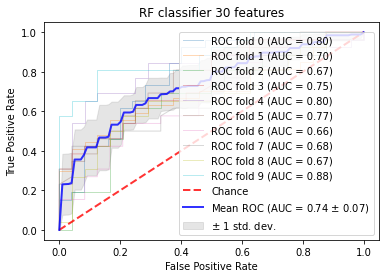

In [27]:

#10,20,30,40,50,60,70,100,150,200,271
for features in [30]:
    print('Taking into accout '+str(features)+' features')
    X=df
    
    y=label_binary#np.where(label>0,1,0)
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=f_classif, k=features)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    #print(featureScores.nlargest(features,'Score'))  #print 10 best features
    top_f=pd.DataFrame(featureScores.nlargest(features,'Score'))
    
    
    print(top_f['Specs'].values)
    
        
    

    n_estimators=1000
    random_state = np.random.RandomState(0)

    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=10)
    classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)


    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)


    X=df[top_f.Specs.tolist()].values
    


    i = 0
    for train, test in cv.split(X,y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])

        y_pred = classifier.predict(X[test])
        tn, fp, fn, tp =confusion_matrix(y[test],y_pred).ravel()

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF classifier '+str(features)+' features')
    plt.legend(loc="lower right")
    plt.savefig('RF_30_features_ROC.pdf')
    plt.show()

# Feature importance

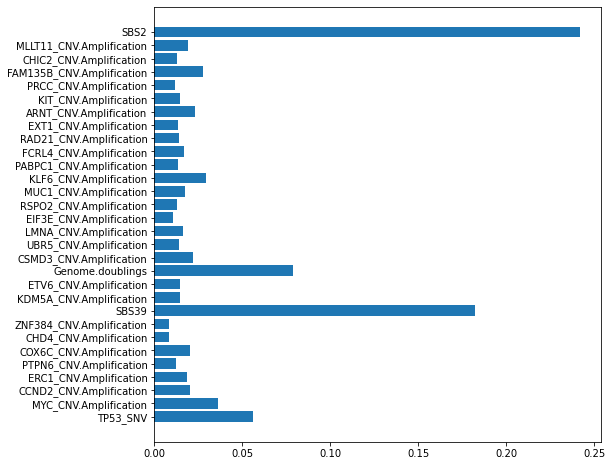

In [35]:
plt.barh(list(df[top_f.Specs.tolist()].columns), classifier.feature_importances_)
plt.savefig('RF_feature_importance_information gain.pdf')